## Introduction To Data Science - Project - By Edward Litvak

### Prologue:

Today, video games are not showing any signs of slowing down when it comes their development and creation. video games can be found anywhere in the world, on any type of device and in a very wide variety. This is an area that, in my opinion, should be investigated in depth and so as to try and see if it is possible to decipher and predict the success of a video game according to its many and unique attributes.

## Research Quesiton

***Is it possible to predict the success of a video game based on its genre, description, release date, developer an so on...?***
***What factors are most important in determining the success of the game?***

### Python Libraries
Before we begin the first step, we must import all of the requisite code libraries so that we can bulid ourselfs a versitile toolbox which will used throughout the project

In [1]:
import pandas as pd
import numpy as np
import bs4
import requests
import time
import warnings
import random
import re

from IPython.display import clear_output
from bs4 import BeautifulSoup  

warnings.filterwarnings('ignore')

# Aquisition Of Video Games Dataset
* #### Web Crawling & Scraping

    We shall use the folowing site (https://www.uvlist.net) inorder to aquire the main dataset. We shall access the web database and display all the appropriate attributes using the next specific URL: (https://www.uvlist.net/gamesearch/?fplat=-&sort=name&fcols=gtdlorp&listed=0). The URL takes us to the search page and includes the necessary columns for each game. Each column in the database is represented in the URL inside the "fcols" argument, for instance: t = type, d = description, l = language...

* We shall employ web crawling using BeautifulSoup but first, we must check that we are allowed access to the site by getting a good response from the server:

In [2]:
web_page = requests.get('https://www.uvlist.net')

if(str(web_page) == '<Response [200]>'):
    print('--- Good responce from database ---')

--- Good responce from database ---


* After recieving a nominal response, we shall create our main dataframe dubbed as "df", with the main attributes:

In [3]:
df = pd.DataFrame()

dataFrameCategoryArray = ['Developer','Release Date','Genre','Language','Platform','Tags','Game Description','Player Options','UVL Score','Review Score','URL In Database']

for category in dataFrameCategoryArray:
    df[category] = np.nan
    
df = df.astype({'UVL Score':'int', 'Review Score':'int'})
df

,Developer,Release Date,Genre,Language,Platform,Tags,Game Description,Player Options,UVL Score,Review Score,URL In Database


* And now for the main scraping code: we shall fetch the first page of the videogames database and create a temporary dataframe to hold the 50 videogames in the page. After that we get the url of the next page and repeat the process

In [4]:
def print_progress_bar(pageIndex,numOfPages):
    
    if (pageIndex != numOfPages):
        complete = '+' * int((pageIndex/numOfPages)*100)
        remaining = '-' * (100 - int((pageIndex/numOfPages)*100)) 
        print('Progress '+ complete + remaining + '[',str(len(complete)),'%]',sep='')
    else:
        complete = '+' * int((pageIndex/numOfPages)*100)
        remaining = '-' * (100 - int((pageIndex/numOfPages)*100)) 
        print('Complete '+ complete + remaining + '[',str(len(complete)),'%]',sep='')
    

In [5]:
starRatingDictionary = {'/gfx/ui/sk.png': 100, '/gfx/ui/sj.png': 90, '/gfx/ui/si.png': 80,'/gfx/ui/sh.png': 70, '/gfx/ui/sg.png': 60, '/gfx/ui/sf.png': 50, '/gfx/ui/se.png': 40, '/gfx/ui/sd.png': 30, '/gfx/ui/sc.png': 20, '/gfx/ui/sb.png': 10, '/gfx/ui/sa.png': 0}

numOfPages = 3066
print_progress_bar(0,numOfPages)

for pageIndex in range(1,(numOfPages+1)):
    
    pageUrl = '/gamesearch/?fplat=-&sort=name&fcols=gtdlorp&listed=0'
    pageUrl = pageUrl.replace("listed=0", "listed="+str((pageIndex-1)*50))
    web_page = requests.get('https://www.uvlist.net' + str(pageUrl))
    
    if(str(web_page) == '<Response [200]>'):
        print('\nGood Response for page No',pageIndex)
    else:
        print('\nBad Response for page No',pageIndex)
        break
          
    clear_output(wait=False)
    print_progress_bar(pageIndex,numOfPages)
    print('Estimated Time: ',int(((numOfPages - pageIndex)*(lowerTimer))/3600),'h ',int((((numOfPages - pageIndex)*lowerTimer)%3600)/60),'m ',int((((numOfPages - pageIndex)*lowerTimer)%3600)%60),'s --',int(((numOfPages - pageIndex)*upperTimer)/3600),'h ',int((((numOfPages - pageIndex)*upperTimer)%3600)/60),'m ',int((((numOfPages - pageIndex)*upperTimer)%3600)%60),'s')

    soupFile = BeautifulSoup(web_page.content,'html.parser')    
    gamesList = soupFile.find_all('tbody')    

    for game in gamesList:
        
        singleGame = game.find_all('td')
        
        dfToAppend = pd.DataFrame({
        "Developer": [singleGame[1].text],
        "Release Date": [singleGame[2].text],
        'Genre': [singleGame[3].text],
        'Language': [singleGame[7].text.replace(',','').split()],
        'Platform': [singleGame[10].text],
        'Tags': [singleGame[4].text.replace(',','').split()],
        'Game Description': [singleGame[6].text],
        'Player Options': [singleGame[5].text],
        'UVL Score': int(100*((float((re.findall(r"[-+]?(?:\d*\.*\d+)", str(game.find('div',attrs={'class':'gauge_inner'})['style'])))[0]))/(float((re.findall(r"[-+]?(?:\d*\.*\d+)", str(game.find('div',attrs={'class':'gauge_outer'})['style'])))[0])))),  
        'Review Score': starRatingDictionary[singleGame[9].find('img')['src']] if (singleGame[9].find('img')) else -1,
        'URL In Database': ['https://www.uvlist.net'+singleGame[0].find('a')['href']]
        }, index=[singleGame[0].find('a').text])

        df = df.append(dfToAppend)

    upperTimer = 6
    lowerTimer = 5
    timer = random.randint(lowerTimer,upperTimer)
    time.sleep(timer)

clear_output(wait=False)
print_progress_bar(pageIndex,numOfPages)

if(pageIndex != numOfPages):
    print('Failed at page No',pageIndex)
    

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [6]:
df

,Developer,Release Date,Genre,Language,Platform,Tags,Game Description,Player Options,UVL Score,Review Score,URL In Database
^_^,author,2012,adventure,"[en, sp]",Windows,[clickadventure],Julian has been turned into a werebunny and is...,single player,55,60,https://www.uvlist.net/game-267583-
_RUZ,breakfastgames,2015,,[],Linux,"[download, itch.io]",Not available on Windows,,72,-1,https://www.uvlist.net/game-219346-RUZ
_RUZ,breakfastgames,2015,,[],Mac OS X,"[download, itch.io, osx]",Not available on Windows,,62,-1,https://www.uvlist.net/game-219350-RUZ
_summer,Hook,2005,adventure Manga Erotic,[jp],Windows,"[anime, eroge, visualnovel]",Takumi Kaizu is a normal high school student e...,single player,78,-1,https://www.uvlist.net/game-156540-summer
_summer ##,GN Software,2006,adventure Manga,[jp],PS2,"[rating-cero-b, rating-esrb-t, visualnovel]","Through various events and people around, scho...",single player,78,-1,https://www.uvlist.net/game-165436-summer
...,...,...,...,...,...,...,...,...,...,...,...
검의 전설,Aproman,1987,role-play Fantasy,[kr],Apple II E,"[horses, riding, walking, walkingsimulator, wa...",성검의 전설 (Legend of the Holy Sword) was the titl...,single player,34,-1,https://www.uvlist.net/game-257849-
미스 애플,Aproman,1989,action/reflex maze,[kr],Apple II E,"[dodging, femaleprotagonist, food-theme]",Miss Apple must navigate the maze and collect ...,single player,31,-1,https://www.uvlist.net/game-257850-
미스 퍼즐,Aproman,1989,puzzle,[kr],Apple II E,"[femaleprotagonist, grid, grid-square, sliding...",,single player,30,-1,https://www.uvlist.net/game-257851-
우주전사둘리,Aproman,1988,action/reflex shooter puzzle Science Fiction,[kr],Apple II E,"[2000s, 21stcentury, 3rdmillennium, bossbattle...",,,39,-1,https://www.uvlist.net/game-257848-


In [7]:
dfBackUp = df.copy()

In [8]:
dfCopy = df.copy()

* We have our dataframe. Notice the two columns dubbed as "UVL Score" & "Review Score". The "Review Score" is the rating given by the professional review staff and the "UVL Score" is the agregated rating given by the online users.
* Its a known fact that the rate in which the community releases videogames, even the simplest of ones, is high. Its most likley that most of the games in the dataframe (which contains ALL possible games) have not been reviewed proffessionaly, so its expected the see a much lower number of professional reviews than Community ones.
* We shall prove this by showing the amount of videogames with verified professional reviews and the amount without (containing values of "-1")

In [9]:
print(dfCopy[dfCopy['Review Score'] != -1].shape,"With professional reviews")
print(dfCopy[dfCopy['Review Score'] == -1].shape,"Without professional reviews")

(20251, 11) With professional reviews
(133013, 11) Without professional reviews


* We dont want to lose most of our dataset because the professional reviewers cant work fast enough to cover all videogames being released. We shall compare both columns with valid values to see how much we can rely on the community reviews

In [10]:
df_for_uvl_score_validation = df.copy()

df_for_uvl_score_validation = df_for_uvl_score_validation[(df_for_uvl_score_validation['Review Score'] != -1)]

df_for_uvl_score_validation['Score Difference'] = abs(df_for_uvl_score_validation['Review Score'] - df_for_uvl_score_validation['UVL Score'])

df_for_uvl_score_validation['Score Difference'].describe()

count    20251.000000
mean        11.066021
std          8.764949
min          0.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         66.000000
Name: Score Difference, dtype: float64

* Using the metrics above, we can deduce that after comparing 20230 video games that have community reviews AND professional reviews. In avarege the difference between the two values is approximatly 11 points (half of the comparisons end up with a difference of 9 points). If the question here is do we want to abandon 86% of the dataset in favor of 11% review score accuracy, then I would argue that its best to keep the review score accuracy, beacuse an 11% percent of potential garbage data is not desirable in the long run...

* Its worth mentioning here that the success of a videogame is not a globaly standardized value, usually a good review score for a videogame is grater than 75 out of 100 as based on popular review sites like these:

https://corp.ign.com/review-practices

https://www.metacritic.com/about-metascores

https://gamingtrend.com/our-review-system/#:~:text=90%2F95%20Excellent%20–%20Very%20hard,with%20its%20share%20of%20faults.

# Optimization Of The Dataset
* #### Missing values

   For the first operation to perform on the dataframe, we shall handle all blank spaces by converting them into "NaN" values. This is necessary inorder for the NaN based functions to work

In [11]:
dfCopy = dfCopy.replace('', np.nan)
dfCopy['Game Description'].info()
dfCopy = dfCopy.replace(' ', np.nan)
dfCopy['Game Description'].info()
dfCopy = dfCopy.replace('  ', np.nan)
dfCopy['Game Description'].info()

<class 'pandas.core.series.Series'>
Index: 153264 entries, ^_^ to 혹성大탈출 
Series name: Game Description
Non-Null Count   Dtype 
--------------   ----- 
153264 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB
<class 'pandas.core.series.Series'>
Index: 153264 entries, ^_^ to 혹성大탈출 
Series name: Game Description
Non-Null Count  Dtype 
--------------  ----- 
31628 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB
<class 'pandas.core.series.Series'>
Index: 153264 entries, ^_^ to 혹성大탈출 
Series name: Game Description
Non-Null Count  Dtype 
--------------  ----- 
31626 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


* Because we decided to preserve the "Review Score" column and not the dataset, we shall drop the "UVL Score" column and remove all videogames without professional reviews.

In [12]:
dfCopy['Review Score'] = np.where((dfCopy['Review Score'] == -1), np.nan, dfCopy['Review Score'])
dfCopy.dropna(subset = ['Review Score'], inplace=True)
dfCopy = dfCopy.drop('UVL Score', axis=1)
dfCopy = dfCopy.astype({'Review Score':'int'})
dfCopy

,Developer,Release Date,Genre,Language,Platform,Tags,Game Description,Player Options,Review Score,URL In Database
^_^,author,2012,adventure,"[en, sp]",Windows,[clickadventure],Julian has been turned into a werebunny and is...,single player,60,https://www.uvlist.net/game-267583-
.detuned,Sony Computer Entertainment (.theprodukkt),2009,rhythm,[],PS3,"[psstore, rating-esrb-e]","Developed by .theprodukkt, .detuned is a perso...",NaN,50,https://www.uvlist.net/game-172882-.detuned
.hack//frägment,Bandai (CyberConnect2),2005,role-play Fantasy,[jp],PS2,"[dothack, magic]",NaN,single player,90,https://www.uvlist.net/game-164483-.hack+fragment
.hack//G.U. vol. 1//Rebirth,Namco;Bandai (CyberConnect2),2006,role-play,"[en, jp]",PS2,"[anime, criware, dothack, magic, rating-esrb-t...",NaN,single player,80,https://www.uvlist.net/game-164484-.hack+G.U.+...
.hack//G.U. vol. 2//Reminisce,Namco;Bandai (CyberConnect2),2006,role-play,"[en, jp]",PS2,"[anime, criware, dothack, magic, roses, roses-...",NaN,single player,80,https://www.uvlist.net/game-164485-.hack+G.U.+...
...,...,...,...,...,...,...,...,...,...,...
Zynaps,Hewson (Microwish Software),1988,shooter Science Fiction,[en],Atari ST,"[lives, score, scrollingshooter]",NaN,single player,60,https://www.uvlist.net/game-39475-Zynaps
Zynaps,Hewson,1987,shooter Science Fiction,[en],Amstrad CPC,"[instantdeath, lives, score, scrollingshooter]",NaN,single player,60,https://www.uvlist.net/game-50067-Zynaps
Zythum,Mirrorsoft,1986,shooter Fantasy,[en],ZX Spectrum,"[lives, mysticprotagonist, runandgun, score]",NaN,single player,60,https://www.uvlist.net/game-15684-Zythum
Zzoom,Imagine,1983,shooting gallery,[en],ZX Spectrum,"[lives, score, ystop100]",NaN,single player,80,https://www.uvlist.net/game-15685-Zzoom


* Its best to remove the "Game Description" column as its not going to contribute to the success of the video games, also, most of the values in the column are "NaN" so its going to interfere more than help.
Also the "URL In Database" is not needed currently...

In [13]:
dfCopy = dfCopy.drop('Game Description', axis=1)
dfCopy = dfCopy.drop('URL In Database', axis=1)
dfCopy

,Developer,Release Date,Genre,Language,Platform,Tags,Player Options,Review Score
^_^,author,2012,adventure,"[en, sp]",Windows,[clickadventure],single player,60
.detuned,Sony Computer Entertainment (.theprodukkt),2009,rhythm,[],PS3,"[psstore, rating-esrb-e]",NaN,50
.hack//frägment,Bandai (CyberConnect2),2005,role-play Fantasy,[jp],PS2,"[dothack, magic]",single player,90
.hack//G.U. vol. 1//Rebirth,Namco;Bandai (CyberConnect2),2006,role-play,"[en, jp]",PS2,"[anime, criware, dothack, magic, rating-esrb-t...",single player,80
.hack//G.U. vol. 2//Reminisce,Namco;Bandai (CyberConnect2),2006,role-play,"[en, jp]",PS2,"[anime, criware, dothack, magic, roses, roses-...",single player,80
...,...,...,...,...,...,...,...,...
Zynaps,Hewson (Microwish Software),1988,shooter Science Fiction,[en],Atari ST,"[lives, score, scrollingshooter]",single player,60
Zynaps,Hewson,1987,shooter Science Fiction,[en],Amstrad CPC,"[instantdeath, lives, score, scrollingshooter]",single player,60
Zythum,Mirrorsoft,1986,shooter Fantasy,[en],ZX Spectrum,"[lives, mysticprotagonist, runandgun, score]",single player,60
Zzoom,Imagine,1983,shooting gallery,[en],ZX Spectrum,"[lives, score, ystop100]",single player,80


* Each videogame is unique. This is why, filling missing values with frequent values or means is NOT desireable, beacuse doing so is actually going to be misleading for that specific videogame. This is why its best to get rid of any entry that has at least ONE "NaN" value.

In [14]:
dfCopy.dropna(inplace=True)
dfCopy

,Developer,Release Date,Genre,Language,Platform,Tags,Player Options,Review Score
^_^,author,2012,adventure,"[en, sp]",Windows,[clickadventure],single player,60
.hack//frägment,Bandai (CyberConnect2),2005,role-play Fantasy,[jp],PS2,"[dothack, magic]",single player,90
.hack//G.U. vol. 1//Rebirth,Namco;Bandai (CyberConnect2),2006,role-play,"[en, jp]",PS2,"[anime, criware, dothack, magic, rating-esrb-t...",single player,80
.hack//G.U. vol. 2//Reminisce,Namco;Bandai (CyberConnect2),2006,role-play,"[en, jp]",PS2,"[anime, criware, dothack, magic, roses, roses-...",single player,80
.hack//G.U. vol. 3//Redemption,Namco;Bandai (CyberConnect2),2007,role-play,"[en, jp]",PS2,"[anime, criware, dothack, magic, rating-esrb-t...",single player,70
...,...,...,...,...,...,...,...,...
Zynaps,Hewson (Microwish Software),1988,shooter Science Fiction,[en],Atari ST,"[lives, score, scrollingshooter]",single player,60
Zynaps,Hewson,1987,shooter Science Fiction,[en],Amstrad CPC,"[instantdeath, lives, score, scrollingshooter]",single player,60
Zythum,Mirrorsoft,1986,shooter Fantasy,[en],ZX Spectrum,"[lives, mysticprotagonist, runandgun, score]",single player,60
Zzoom,Imagine,1983,shooting gallery,[en],ZX Spectrum,"[lives, score, ystop100]",single player,80


* #### Handling duplicate values

   Before we handle duplicates, it seems that the "duplicated" function does not like having list values in the "Tags" & "Language" columns. We shall resolve this by taking the lists and convert them to a string consisting of the supported languages and the number of tags that describe a videogam respectivily. The more tags there are, means there's more contribution and interest in describing the videogame.

In [15]:
for index in range(0,(len(dfCopy))):
    dfCopy['Language'][index] = set(dfCopy['Language'][index])
    dfCopy['Language'][index] = list(dfCopy['Language'][index])
    dfCopy['Language'][index] = ' '.join(dfCopy['Language'][index])
    dfCopy['Tags'][index] = len(dfCopy['Tags'][index])

In [16]:
dfCopy

,Developer,Release Date,Genre,Language,Platform,Tags,Player Options,Review Score
^_^,author,2012,adventure,en sp,Windows,1,single player,60
.hack//frägment,Bandai (CyberConnect2),2005,role-play Fantasy,jp,PS2,2,single player,90
.hack//G.U. vol. 1//Rebirth,Namco;Bandai (CyberConnect2),2006,role-play,en jp,PS2,7,single player,80
.hack//G.U. vol. 2//Reminisce,Namco;Bandai (CyberConnect2),2006,role-play,en jp,PS2,6,single player,80
.hack//G.U. vol. 3//Redemption,Namco;Bandai (CyberConnect2),2007,role-play,en jp,PS2,6,single player,70
...,...,...,...,...,...,...,...,...
Zynaps,Hewson (Microwish Software),1988,shooter Science Fiction,en,Atari ST,3,single player,60
Zynaps,Hewson,1987,shooter Science Fiction,en,Amstrad CPC,4,single player,60
Zythum,Mirrorsoft,1986,shooter Fantasy,en,ZX Spectrum,4,single player,60
Zzoom,Imagine,1983,shooting gallery,en,ZX Spectrum,3,single player,80


* Now for the duplicates:

In [17]:
dfCopy[dfCopy.duplicated()].shape

(29, 8)

In [18]:
dfCopy.drop_duplicates(inplace=True)

In [19]:
dfCopy[dfCopy.duplicated()].shape

(0, 8)

* #### Corrupt Data

   After handling missing and duplicate values, we need to check the integrity of out data, that means, going over all columns and refining them as much as possible.
   
   We'll start by converting all numeric columns to their proper types.

In [20]:
dfCopy.info()
'''dfCopy = dfCopy.astype({'Release Date':'int', 'Tags':'int', 'Review Score':'int'})''' # Outputs error

<class 'pandas.core.frame.DataFrame'>
Index: 18683 entries, ^_^ to Zzzzz
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Developer       18683 non-null  object
 1   Release Date    18683 non-null  object
 2   Genre           18683 non-null  object
 3   Language        18683 non-null  object
 4   Platform        18683 non-null  object
 5   Tags            18683 non-null  object
 6   Player Options  18683 non-null  object
 7   Review Score    18683 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.3+ MB


"dfCopy = dfCopy.astype({'Release Date':'int', 'Tags':'int', 'Review Score':'int'})"

* We got an error when trying to convert the "Release Date" column to integers. It cited that there was a value like this: "198?". We shall look further into this column...

In [21]:
dfCopy['Release Date'].unique()


array(['2012', '2005', '2006', '2007', '2003', '2002', '2004', '1988',
       '1993', '1991', '1981', '2000', '1999', '1985', '1992', '1994',
       '1986', '1998', '1987', '1979', '1990', '1984', '1989', '1996',
       '2010', '2014', '1978', '1983', '1980', '1997', '1995', '198?',
       '1982', '2001', 'TBA ', '2015', '2013', '2009', '?', '2008',
       '2016', '1976', '2011', '201?', '1977', '2020', '2017', '200?',
       '1966', '1971', '1974', '2018', '1975', '1972', '2019', '1952',
       '19??', '2021', '1962', '1958'], dtype=object)

In [22]:
dfCopy['Release Date'] = np.where((dfCopy['Release Date'] == 'TBA ') | (dfCopy['Release Date'] == '?') | (dfCopy['Release Date'] == '198?') | (dfCopy['Release Date'] == '19??') | (dfCopy['Release Date'] == '200?') | (dfCopy['Release Date'] == '201?'), np.nan, dfCopy['Release Date'])
dfCopy = dfCopy.dropna()
dfCopy = dfCopy.astype({'Release Date':'int', 'Tags':'int', 'Review Score':'int'})
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18648 entries, ^_^ to Zzzzz
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Developer       18648 non-null  object
 1   Release Date    18648 non-null  int64 
 2   Genre           18648 non-null  object
 3   Language        18648 non-null  object
 4   Platform        18648 non-null  object
 5   Tags            18648 non-null  int64 
 6   Player Options  18648 non-null  object
 7   Review Score    18648 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.3+ MB


* #### Optimizing The Data

   Finally we can start optimizing the data. We shall do so by handling complicated strings found in the "Genre" column and "Player Options" column.

In [23]:
dfCopy['Genre'].describe()

count      18648
unique      1216
top       sport 
freq        1157
Name: Genre, dtype: object

In [24]:
dfCopy['Genre'].unique()

array(['adventure ', 'role-play Fantasy ', 'role-play ', ...,
       'racing/driving adventure Manga ',
       'action/reflex strategy role-play Manga Science Fiction ',
       'platformer adventure Historical '], dtype=object)

* The "Genre" column consists of strings that represent the main genres a specific videogame applies to. Notice that the main category is the first string. We shall use this fact and convert all "Genre" sections of each videogame entry into the first string in their respective section

In [25]:
dfCopy['Genre'] = dfCopy['Genre'].str.replace("/"," ",regex=True)
dfCopy['Genre'] = dfCopy['Genre'].str.replace(","," ",regex=True)
dfCopy['Genre'] = dfCopy['Genre'].str.split()

for index in range(0,(len(dfCopy))):
    dfCopy['Genre'][index] = dfCopy['Genre'][index][0]

dfCopy

,Developer,Release Date,Genre,Language,Platform,Tags,Player Options,Review Score
^_^,author,2012,adventure,en sp,Windows,1,single player,60
.hack//frägment,Bandai (CyberConnect2),2005,role-play,jp,PS2,2,single player,90
.hack//G.U. vol. 1//Rebirth,Namco;Bandai (CyberConnect2),2006,role-play,en jp,PS2,7,single player,80
.hack//G.U. vol. 2//Reminisce,Namco;Bandai (CyberConnect2),2006,role-play,en jp,PS2,6,single player,80
.hack//G.U. vol. 3//Redemption,Namco;Bandai (CyberConnect2),2007,role-play,en jp,PS2,6,single player,70
...,...,...,...,...,...,...,...,...
Zynaps,Hewson (Microwish Software),1988,shooter,en,Atari ST,3,single player,60
Zynaps,Hewson,1987,shooter,en,Amstrad CPC,4,single player,60
Zythum,Mirrorsoft,1986,shooter,en,ZX Spectrum,4,single player,60
Zzoom,Imagine,1983,shooting,en,ZX Spectrum,3,single player,80


In [26]:
dfCopy['Genre'].describe()

count      18648
unique        30
top       action
freq        4461
Name: Genre, dtype: object

* Now for the "Player Options" column

In [27]:
dfCopy['Player Options'].describe()

count             18648
unique               67
top       single player
freq              15693
Name: Player Options, dtype: object

In [28]:
dfCopy['Player Options'].unique()

array(['single player', 'single player, LAN', 'single player, hotseat',
       'single player, shared-screen', 'shared-screen',
       'single player, wireless', 'single player, split-screen',
       'single player, shared-screen, Internet',
       'single player, Internet', 'Internet, single player',
       'single player, LAN, Internet, E-mail',
       'single player, LAN, Internet', 'LAN, Internet, single player',
       'wireless, single player',
       'single player, shared-screen, LAN, Internet',
       'single player, hotseat, Internet', 'Internet',
       'single player, hotseat, LAN, Internet',
       'shared-screen, single player', 'LAN, single player',
       'single player, cable/nullmodem, LAN, Internet',
       'single player, cable/nullmodem', 'LAN, Internet', 'split-screen',
       'single player, shared-screen, hotseat',
       'single player, shared-screen, LAN', 'hotseat, single player',
       'split-screen, single player',
       'single player, split-screen, LAN,

* The "Player Options" column consist of strings that represent the different playing modes possible in each specific videogame. Notice that most of the entries consist of the same modes but in different oreder. We shall implement a clever way to unify the same arrays with different orders by using SETS.

In [29]:
dfCopy['Player Options'] = dfCopy['Player Options'].str.replace("single player","single-Player",regex=True)
dfCopy['Player Options'] = dfCopy['Player Options'].str.replace("single player","single-Player",regex=True)
dfCopy['Player Options'] = dfCopy['Player Options'].str.replace("null","",regex=True)
dfCopy['Player Options'] = dfCopy['Player Options'].str.replace(","," ",regex=True)

In [30]:
dfCopy['Player Options'].unique()

array(['single-Player', 'single-Player  LAN', 'single-Player  hotseat',
       'single-Player  shared-screen', 'shared-screen',
       'single-Player  wireless', 'single-Player  split-screen',
       'single-Player  shared-screen  Internet',
       'single-Player  Internet', 'Internet  single-Player',
       'single-Player  LAN  Internet  E-mail',
       'single-Player  LAN  Internet', 'LAN  Internet  single-Player',
       'wireless  single-Player',
       'single-Player  shared-screen  LAN  Internet',
       'single-Player  hotseat  Internet', 'Internet',
       'single-Player  hotseat  LAN  Internet',
       'shared-screen  single-Player', 'LAN  single-Player',
       'single-Player  cable/modem  LAN  Internet',
       'single-Player  cable/modem', 'LAN  Internet', 'split-screen',
       'single-Player  shared-screen  hotseat',
       'single-Player  shared-screen  LAN', 'hotseat  single-Player',
       'split-screen  single-Player',
       'single-Player  split-screen  LAN  Interne

In [31]:
dfCopy['Player Options'] = dfCopy['Player Options'].str.split()

In [32]:
dfCopy

,Developer,Release Date,Genre,Language,Platform,Tags,Player Options,Review Score
^_^,author,2012,adventure,en sp,Windows,1,[single-Player],60
.hack//frägment,Bandai (CyberConnect2),2005,role-play,jp,PS2,2,[single-Player],90
.hack//G.U. vol. 1//Rebirth,Namco;Bandai (CyberConnect2),2006,role-play,en jp,PS2,7,[single-Player],80
.hack//G.U. vol. 2//Reminisce,Namco;Bandai (CyberConnect2),2006,role-play,en jp,PS2,6,[single-Player],80
.hack//G.U. vol. 3//Redemption,Namco;Bandai (CyberConnect2),2007,role-play,en jp,PS2,6,[single-Player],70
...,...,...,...,...,...,...,...,...
Zynaps,Hewson (Microwish Software),1988,shooter,en,Atari ST,3,[single-Player],60
Zynaps,Hewson,1987,shooter,en,Amstrad CPC,4,[single-Player],60
Zythum,Mirrorsoft,1986,shooter,en,ZX Spectrum,4,[single-Player],60
Zzoom,Imagine,1983,shooting,en,ZX Spectrum,3,[single-Player],80


In [33]:
dfCopy['Player Options'].describe()

count               18648
unique                 67
top       [single-Player]
freq                15693
Name: Player Options, dtype: object

In [34]:
for index in range(0,(len(dfCopy))):
    dfCopy['Player Options'][index] = set(dfCopy['Player Options'][index])
    dfCopy['Player Options'][index] = list(dfCopy['Player Options'][index])

dfCopy['Player Options'].describe()

count               18648
unique                 54
top       [single-Player]
freq                15693
Name: Player Options, dtype: object

In [35]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18648 entries, ^_^ to Zzzzz
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Developer       18648 non-null  object
 1   Release Date    18648 non-null  int64 
 2   Genre           18648 non-null  object
 3   Language        18648 non-null  object
 4   Platform        18648 non-null  object
 5   Tags            18648 non-null  int64 
 6   Player Options  18648 non-null  object
 7   Review Score    18648 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.8+ MB


In [36]:
dfCopy.describe(include='all')

,Developer,Release Date,Genre,Language,Platform,Tags,Player Options,Review Score
count,18648,18648.000000,18648,18648,18648,18648.000000,18648,18648.000000
unique,7916,NaN,30,305,123,NaN,54,NaN
top,Sega,NaN,action,en,Windows,NaN,[single-Player],NaN
freq,329,NaN,4461,11620,1892,NaN,15693,NaN
mean,NaN,1993.516302,NaN,NaN,NaN,10.568372,NaN,68.460425
std,NaN,8.191771,NaN,NaN,NaN,19.573835,NaN,13.625114
min,NaN,1952.000000,NaN,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,1988.000000,NaN,NaN,NaN,3.000000,NaN,60.000000
50%,NaN,1991.000000,NaN,NaN,NaN,5.000000,NaN,70.000000
75%,NaN,1999.000000,NaN,NaN,NaN,9.000000,NaN,80.000000


# EDA
* #### Dataframe Analisys

   In this section, we will analize the dataframe using graphs of all sort inorder to try and find corolations between the different parameters that make all the videogames. First, we'll import the nececary libraries

* #### Preparing the data for display

In [37]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

#EAC71B
#002856

In [38]:
Number_Of_Games_In_Platform = {}

for index in range(0,(len(dfCopy))):
    if (dfCopy.iloc[index,4] in Number_Of_Games_In_Platform):
        Number_Of_Games_In_Platform[dfCopy.iloc[index,4]] += 1
    else:
        Number_Of_Games_In_Platform[dfCopy.iloc[index,4]] = 1     

In [39]:
Array_Of_Platforms_With_More_Than_150_Games_In_Our_Dataset = list()

for platform in Number_Of_Games_In_Platform:
    if Number_Of_Games_In_Platform[platform] > 150:
        Array_Of_Platforms_With_More_Than_150_Games_In_Our_Dataset.append(platform)

In [40]:
dfCopy2 = dfCopy.copy()
bins = [1950,1960,1970,1980,1990,2000,2010,2020,2023]
labels = ['1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010-2020','2020-2023']
dfCopy2['Release Date'] = pd.cut(dfCopy2['Release Date'],bins,labels=labels)
dfCopy2.rename(columns = {'Release Date':'Release_Dates', 'Language':'Supported_Languages', 'Tags':'Number_Of_Tags'}, inplace = True)

In [41]:
Number_Of_Games_Per_Dates = {}

for index in range(0,(len(dfCopy2))):
    if (dfCopy2.iloc[index,1] in Number_Of_Games_Per_Dates):
        Number_Of_Games_Per_Dates[dfCopy2.iloc[index,1]] += 1
    else:
        Number_Of_Games_Per_Dates[dfCopy2.iloc[index,1]] = 1 

Array_Of_Dates = list()

for dateRange in Number_Of_Games_Per_Dates:
    if Number_Of_Games_Per_Dates[dateRange] > 10:
        Array_Of_Dates.append(dateRange)

In [42]:
Array_Of_Platforms_With_More_Than_500_Games_In_Our_Dataset = list()

for platform in Number_Of_Games_In_Platform:
    if Number_Of_Games_In_Platform[platform] > 500:
        Array_Of_Platforms_With_More_Than_500_Games_In_Our_Dataset.append(platform)

In [43]:
for iterator in range(0,(len(dfCopy))):

    array = dfCopy.iloc[iterator,3].split()
    dfCopy.iloc[iterator,3] = len(array)

dfCopy.rename(columns = {'Release Date':'Release_Dates', 'Language':'Supported_Languages', 'Tags':'Number_Of_Tags'}, inplace = True)

In [44]:
dfCopy3 = dfCopy2.copy()
delete = []

for iterator in range(0,(len(dfCopy3))):
    if not dfCopy3.iloc[iterator,4] in Array_Of_Platforms_With_More_Than_500_Games_In_Our_Dataset:
        delete.append(dfCopy3.index[iterator])
        
    array = dfCopy3.iloc[iterator,3].split()
    dfCopy3.iloc[iterator,3] = len(array)
        
dfCopy3 = dfCopy3.drop(delete)

In [45]:
Array_Of_Platforms_With_More_Than_1000_Games_In_Our_Dataset = list()

for platform in Number_Of_Games_In_Platform:
    if Number_Of_Games_In_Platform[platform] > 1000:
        Array_Of_Platforms_With_More_Than_1000_Games_In_Our_Dataset.append(platform)

In [46]:
dfCopy4 = dfCopy2.copy()
delete = []

for iterator in range(0,(len(dfCopy4))):
    if not dfCopy4.iloc[iterator,4] in Array_Of_Platforms_With_More_Than_1000_Games_In_Our_Dataset:
        delete.append(dfCopy4.index[iterator])
    
    array = dfCopy4.iloc[iterator,3].split()
    dfCopy4.iloc[iterator,3] = len(array)
    
dfCopy4 = dfCopy4.drop(delete)

In [47]:
Array_Of_Platforms_With_More_Than_150_Games_In_Our_Dataset = list()

for platform in Number_Of_Games_In_Platform:
    if Number_Of_Games_In_Platform[platform] > 150:
        Array_Of_Platforms_With_More_Than_150_Games_In_Our_Dataset.append(platform)

In [48]:
dfCopy5 = dfCopy2.copy()
delete = []

for iterator in range(0,(len(dfCopy5))):
    if not dfCopy5.iloc[iterator,4] in Array_Of_Platforms_With_More_Than_150_Games_In_Our_Dataset:
        delete.append(dfCopy5.index[iterator])
        
    array = dfCopy5.iloc[iterator,3].split()
    dfCopy5.iloc[iterator,3] = len(array)
        
dfCopy5 = dfCopy5.drop(delete)

### Number of video games in the most popular platforms

* The first graph will show the amount of video games in most popular platforms, to get there we need to make us a dictionary so as to get the specifics that we want:

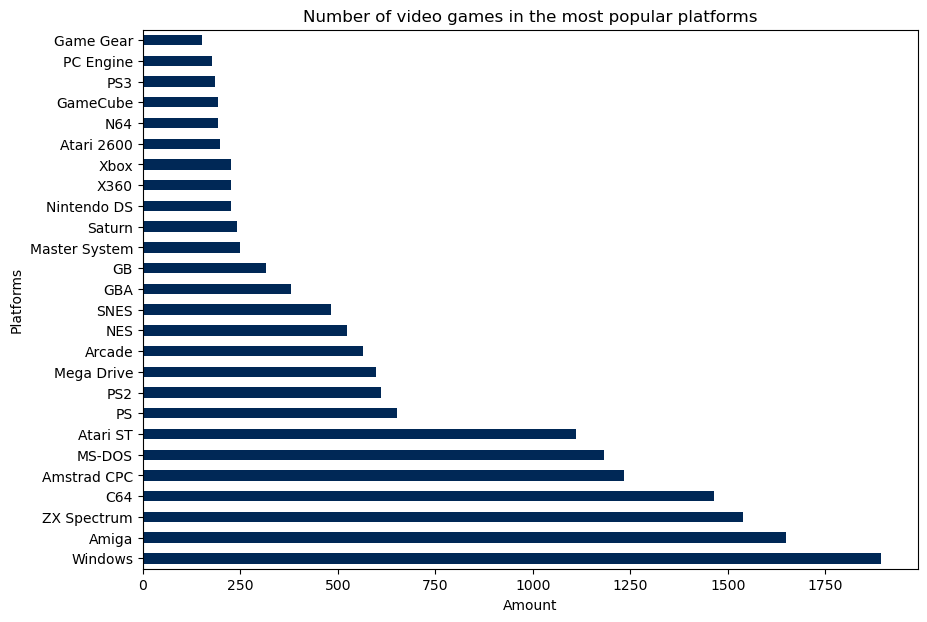

In [49]:
ax = dfCopy.Platform[(dfCopy['Platform'].isin(Array_Of_Platforms_With_More_Than_150_Games_In_Our_Dataset))].value_counts().plot(kind = "barh" , color = "#002856", figsize = (10,7))
ax.set_title('Number of video games in the most popular platforms')
ax.set_xlabel('Amount')
ax.set_ylabel('Platforms')
plt.show()

#### We can see that in our dataframe, the Windows operating system has the largest collection of video games, followed by lesser known consoles.<br><br><br><br><br>

### Number of videogames per release dates

* This next graph will show the amount of video games in different release date ranges

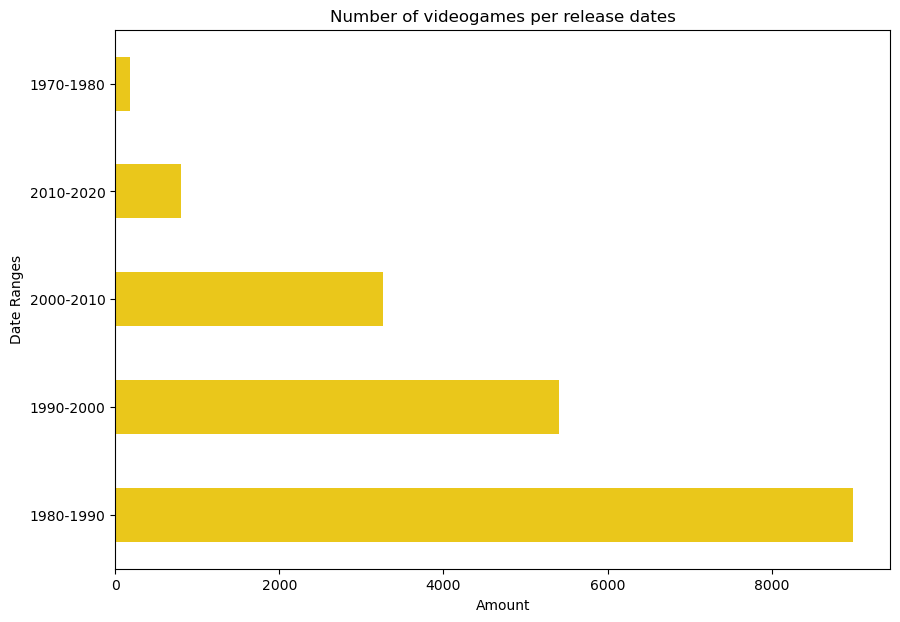

In [50]:
ax = dfCopy2.Release_Dates[(dfCopy2['Release_Dates'].isin(Array_Of_Dates))].value_counts().nlargest(n=5).plot(kind = "barh" , color = "#EAC71B", figsize = (10,7))
ax.set_title('Number of videogames per release dates')
ax.set_xlabel('Amount')
ax.set_ylabel('Date Ranges')
plt.show()

#### We can see that in our dataframe, most videogames were released in the early 2000's, possibly caused by the high amount of different vintage consoles/handhelds and platforms of that era.<br><br><br><br><br>

### Number of videogames per supported number of languages

* This graph will show the amount of video games with their respective numbers of languages programmed in them

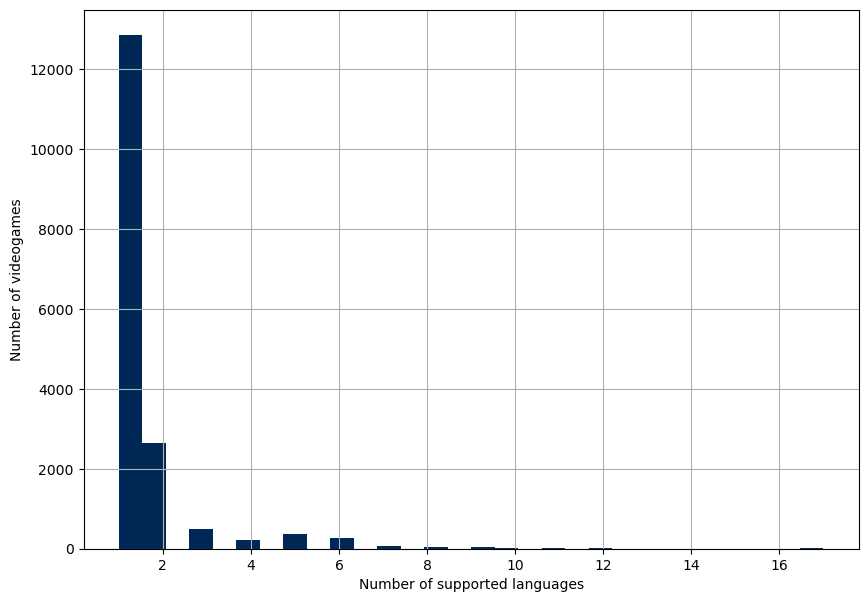

In [51]:
for index in range(0,(len(dfCopy2))):

    array = dfCopy2.iloc[index,3].split()
    dfCopy2.iloc[index,3] = len(array)
    
dfCopy2['Supported_Languages'].hist( bins = 30, range = (1,17), color='#002856',figsize = (10,7))
plt.xlabel('Number of supported languages')
plt.ylabel('Number of videogames')
plt.show()

#### In our dataframe, most videogames support only one language, meaning that most videogames are created for a specific country or they support the globaly renounced english language.<br><br><br><br><br>

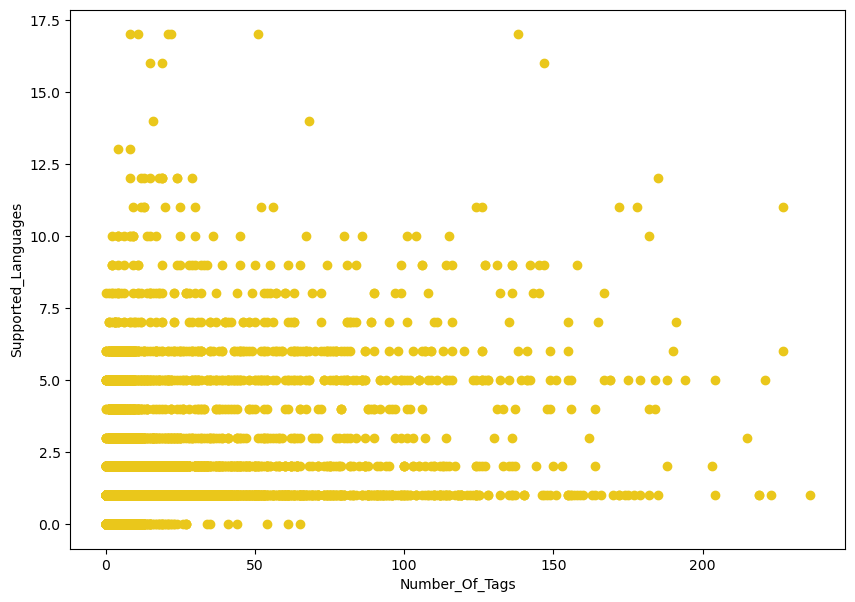

In [52]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.scatter(dfCopy2['Number_Of_Tags'],dfCopy2['Supported_Languages'],color='#EAC71B')
plt.xlabel('Number_Of_Tags')
plt.ylabel('Supported_Languages')
ax.ticklabel_format(style='plain') # prevents matplotlib from displaying the price in a scientific notation. 
plt.show()

### Number Of Games And Their Respective Success Figures In Platforms With >500 / >1000 Games

* These graphs will show the amount of videogames in the most popular platforms, devided by the review scores

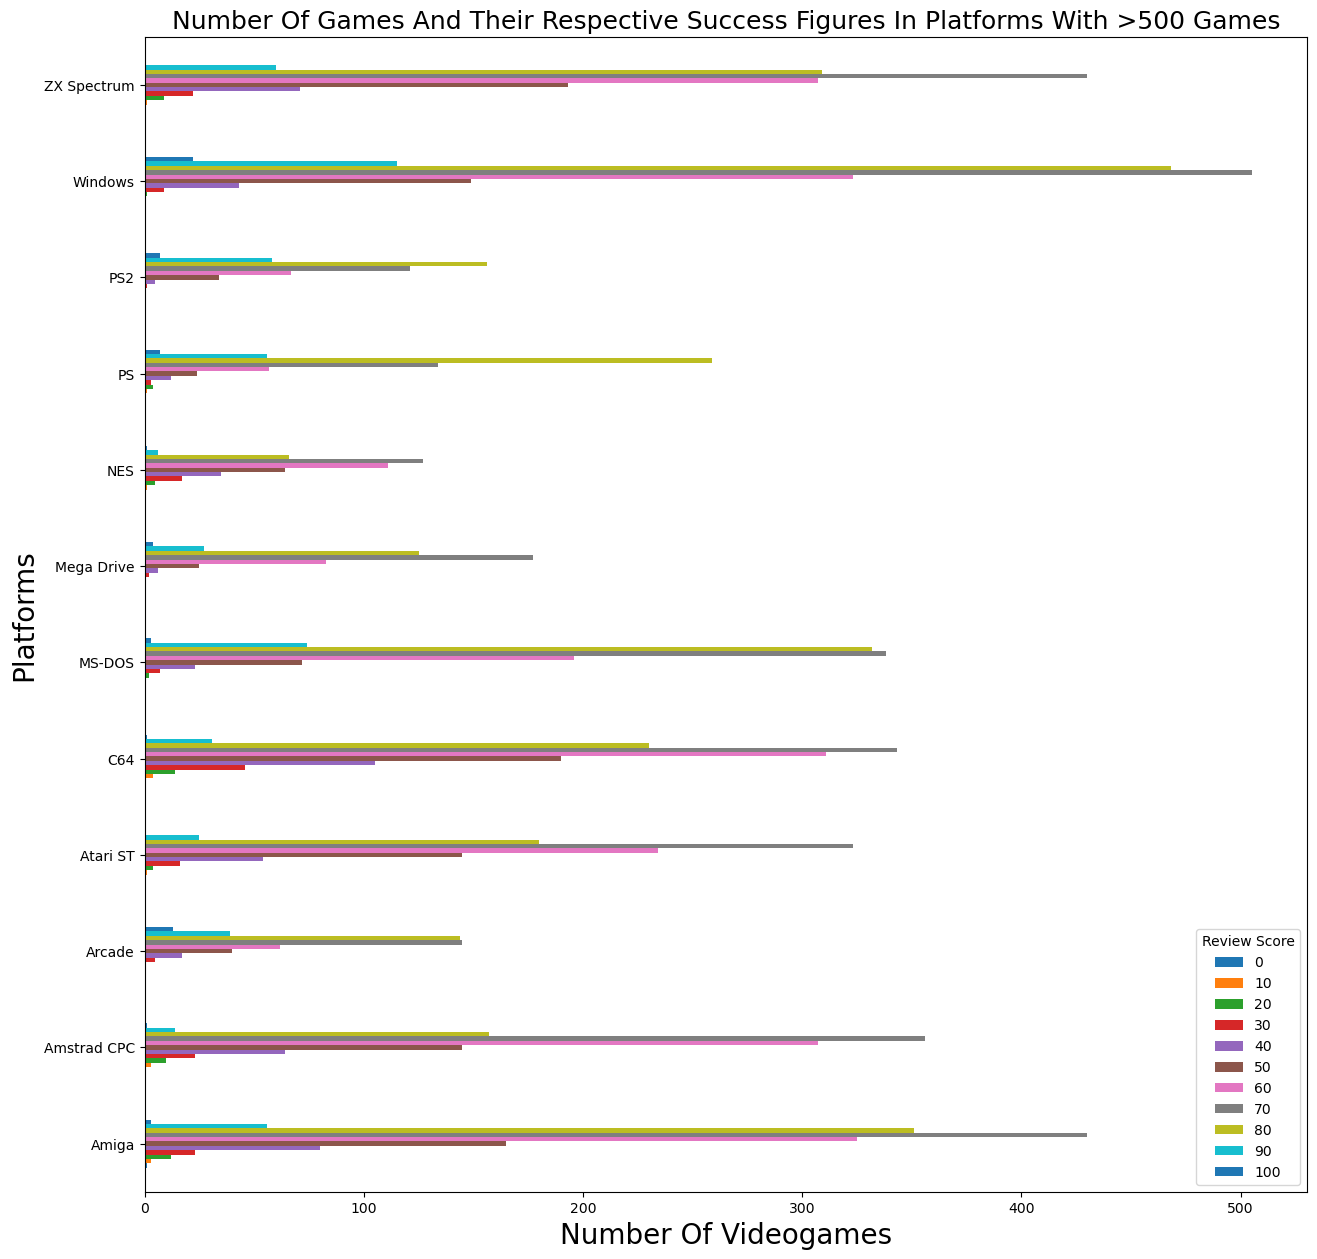

In [53]:
ct = pd.crosstab(dfCopy3['Platform'],dfCopy3['Review Score'])
ax = ct.plot(kind = 'barh', figsize = (15,15))
ax.set_xlabel('Number Of Videogames', fontsize = 20)
ax.set_ylabel('Platforms', fontsize = 20)
ax.set_title('Number Of Games And Their Respective Success Figures In Platforms With >500 Games', fontsize = 18)
plt.show()

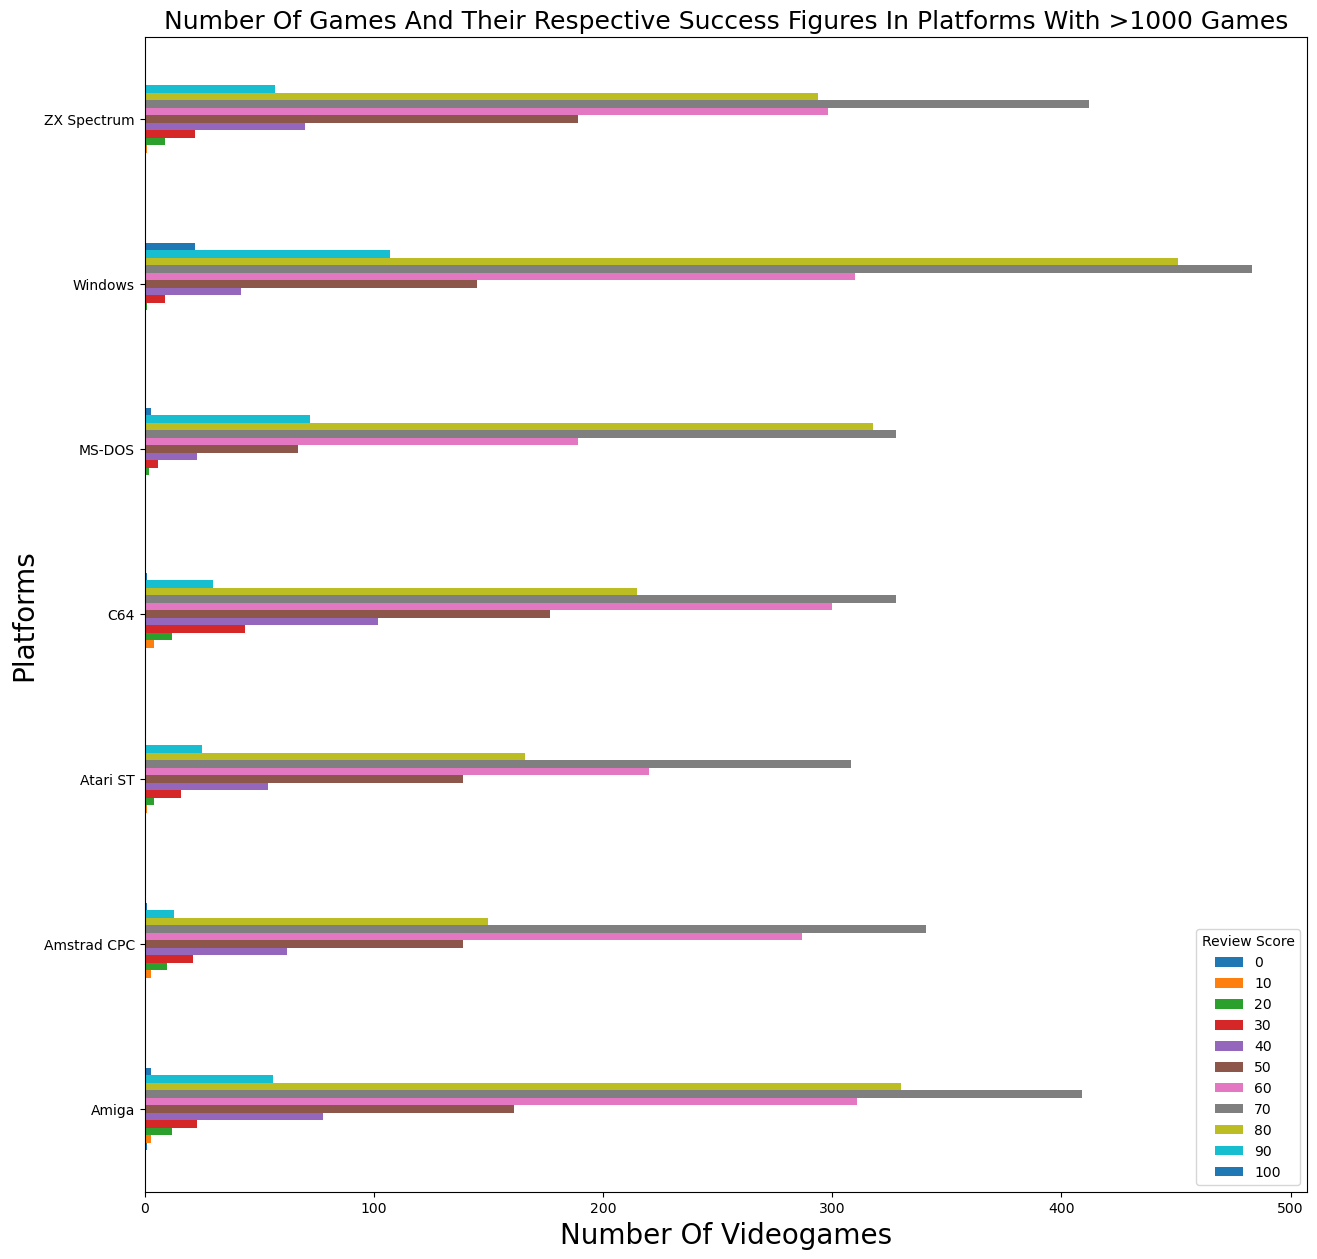

In [54]:
ct = pd.crosstab(dfCopy4['Platform'],dfCopy4['Review Score'])
ax = ct.plot(kind = 'barh', figsize = (15,15))
ax.set_xlabel('Number Of Videogames', fontsize = 20)
ax.set_ylabel('Platforms', fontsize = 20)
ax.set_title('Number Of Games And Their Respective Success Figures In Platforms With >1000 Games', fontsize = 18)
plt.show()

### Number Of Tags/Supported Languages In Videogames In Relation With Different Platforms With >150 Games While Also Regarding Relaese Date & Review Score

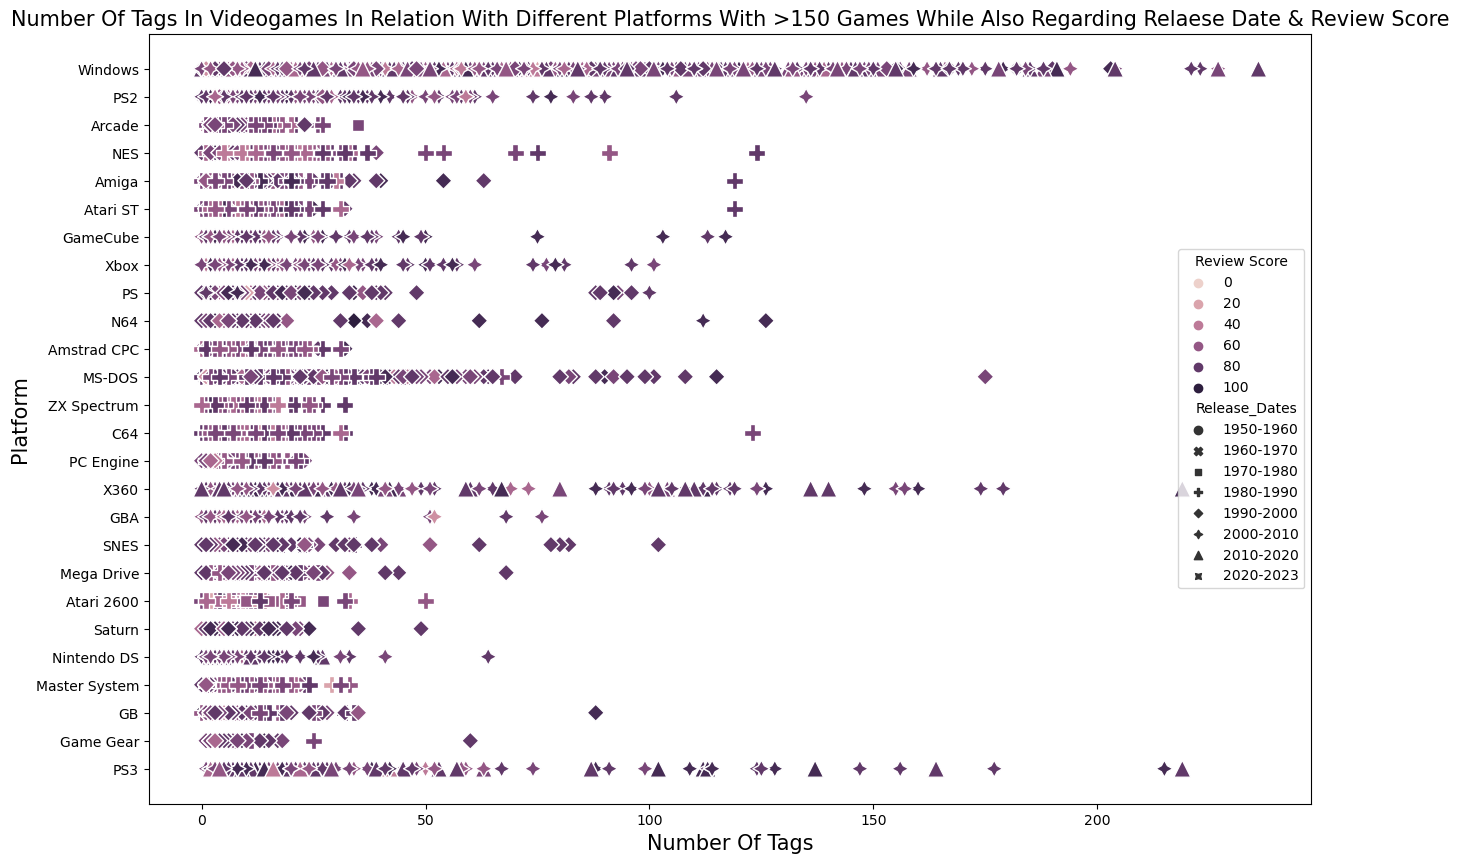

In [55]:
figure = plt.figure(figsize=(15,10))
subFig = figure.add_subplot(1,1,1)

sns.scatterplot(x=dfCopy5['Number_Of_Tags'], y=dfCopy5['Platform'], hue=dfCopy5['Review Score'], style=dfCopy5['Release_Dates'], ax=subFig, s = 150)

subFig.set_title('Number Of Tags In Videogames In Relation With Different Platforms With >150 Games While Also Regarding Relaese Date & Review Score',fontsize = 15)
subFig.set_xlabel('Number Of Tags',fontsize = 15)
subFig.set_ylabel('Platform',fontsize = 15)
subFig.ticklabel_format(style='plain', axis='x',useOffset=False)

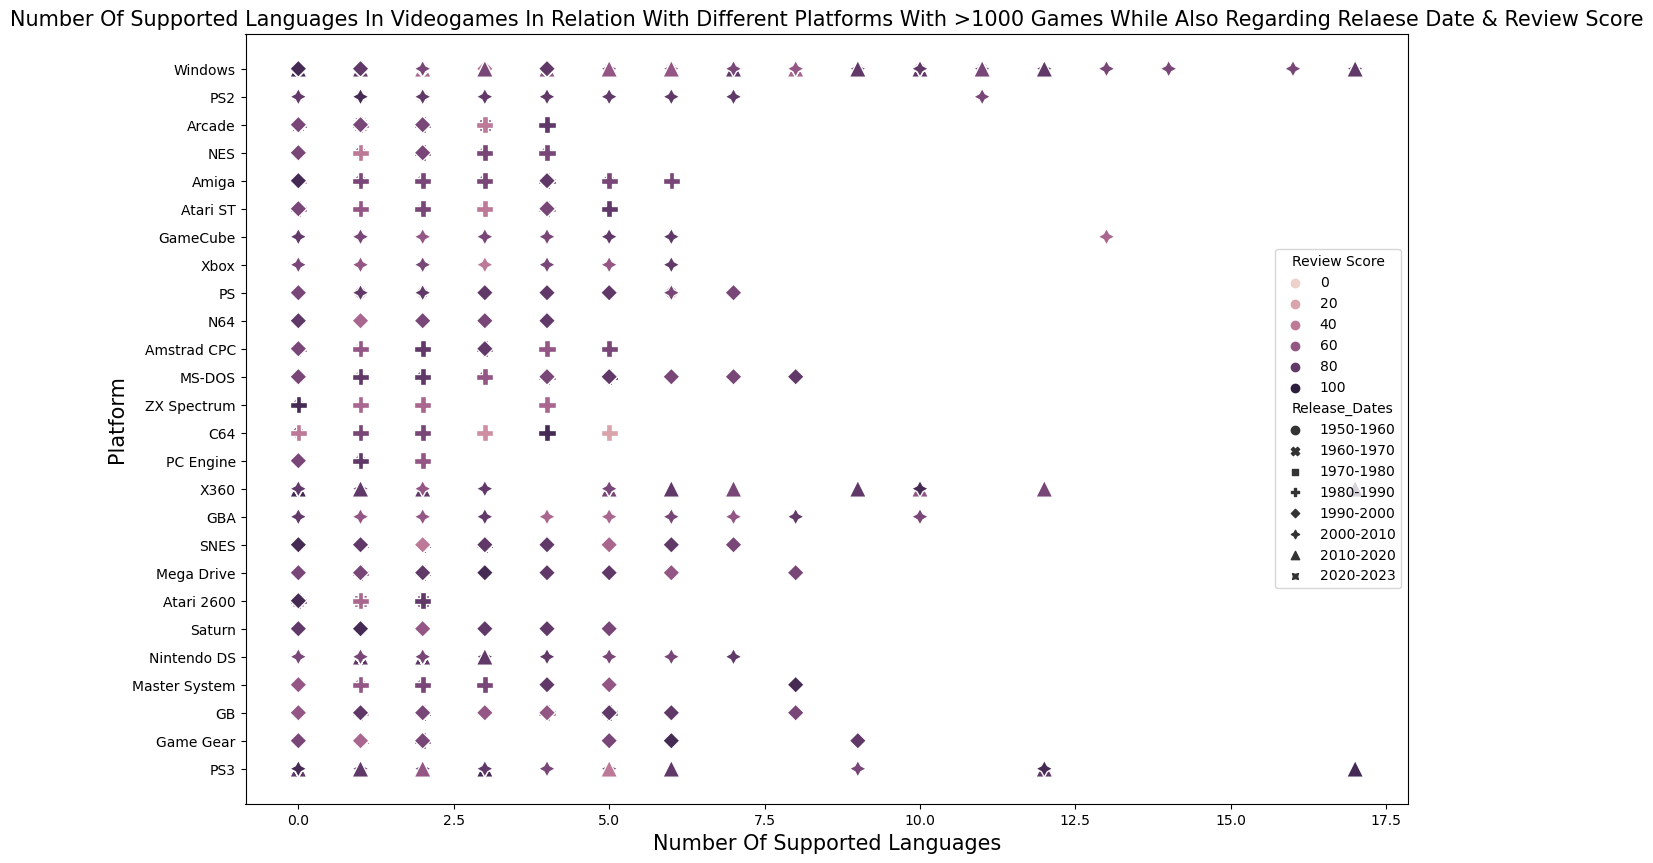

In [56]:
figure = plt.figure(figsize=(15,10))
subFig = figure.add_subplot(1,1,1)

sns.scatterplot(x=dfCopy5['Supported_Languages'], y=dfCopy5['Platform'], hue=dfCopy5['Review Score'], style=dfCopy5['Release_Dates'], ax=subFig, s = 150)

subFig.set_title('Number Of Supported Languages In Videogames In Relation With Different Platforms With >1000 Games While Also Regarding Relaese Date & Review Score',fontsize = 15)
subFig.set_xlabel('Number Of Supported Languages',fontsize = 15)
subFig.set_ylabel('Platform',fontsize = 15)
subFig.ticklabel_format(style='plain', axis='x',useOffset=False)

#### Going deeper into the analysis of more complex graphs, it seems we cannot deduce a corolation between the different sets of videogame parameters. Maybe time to find possible corolations using mathematics!

### Chi-Square Test Of Independance

In [57]:
from scipy.stats import chi2_contingency

def CH2_Test (dataframe,column1, column2, show):
    CH2 = pd.crosstab(dataframe[column1],dataframe[column2])
    P0 = chi2_contingency(CH2)[1]
    if show:
        print(chi2_contingency(CH2))
    if chi2_contingency(CH2)[1] < 0.05:
        print("\nThe columns [",column1," / ",column2,"] are DEPENDENT")
    else:
        print("\nThe columns [",column1,"/",column2,"] are INDEPENDENT")
        
dfCopy = dfCopy.astype({'Supported_Languages':'int', 'Review Score':'int', 'Number_Of_Tags':'int', 'Release_Dates':'int'})

In [58]:
CH2_Test(dfCopy, 'Review Score', 'Number_Of_Tags', True)

(1490.5860265760152, 0.9999999998777939, 1850, array([[2.33268983e-02, 8.09738310e-02, 1.25268125e-01, ...,
        5.36250536e-05, 1.07250107e-04, 5.36250536e-05],
       [3.73230373e-01, 1.29558130e+00, 2.00429000e+00, ...,
        8.58000858e-04, 1.71600172e-03, 8.58000858e-04],
       [1.86615187e+00, 6.47790648e+00, 1.00214500e+01, ...,
        4.29000429e-03, 8.58000858e-03, 4.29000429e-03],
       ...,
       [1.20973295e+02, 4.19930287e+02, 6.49640498e+02, ...,
        2.78099528e-01, 5.56199056e-01, 2.78099528e-01],
       [2.84821429e+01, 9.88690476e+01, 1.52952381e+02, ...,
        6.54761905e-02, 1.30952381e-01, 6.54761905e-02],
       [2.86920849e+00, 9.95978121e+00, 1.54079794e+01, ...,
        6.59588160e-03, 1.31917632e-02, 6.59588160e-03]]))

The columns [ Review Score / Number_Of_Tags ] are INDEPENDENT


In [59]:
CH2_Test(dfCopy, 'Review Score', 'Release_Dates', False)


The columns [ Review Score  /  Release_Dates ] are DEPENDENT


In [60]:
CH2_Test(dfCopy, 'Supported_Languages', 'Release_Dates', False)


The columns [ Supported_Languages  /  Release_Dates ] are DEPENDENT


In [61]:
CH2_Test(dfCopy, 'Supported_Languages', 'Review Score', False)


The columns [ Supported_Languages  /  Review Score ] are DEPENDENT


In [62]:
CH2_Test(dfCopy, 'Genre', 'Review Score', False)


The columns [ Genre  /  Review Score ] are DEPENDENT


In [63]:
CH2_Test(dfCopy, 'Number_Of_Tags', 'Review Score', False)


The columns [ Number_Of_Tags / Review Score ] are INDEPENDENT


In [64]:
CH2_Test(dfCopy, 'Number_Of_Tags', 'Release_Dates', False)


The columns [ Number_Of_Tags  /  Release_Dates ] are DEPENDENT


### Pearson correlation coefficient

In [65]:
dfCopy[['Supported_Languages','Genre','Release_Dates','Review Score','Number_Of_Tags']].corr()

,Supported_Languages,Release_Dates,Review Score,Number_Of_Tags
Supported_Languages,1.000000,0.319645,0.036161,0.320366
Release_Dates,0.319645,1.000000,0.215102,0.387201
Review Score,0.036161,0.215102,1.000000,0.109429
Number_Of_Tags,0.320366,0.387201,0.109429,1.000000


#### All in all, it seems that we get mixed results from the different EDA test/graphs. The Ch2 results tell us that most of the columns do have a sufficiant conection between them, while the Pearson correlation coefficient tell us about a reletivly minor connection. After also observing the graphs, we can get a general feeling that a videogame's components have little to do with its success. We shall move to our final instrument inorder to try and see if a videogame's attributes do have an effect on its success, machine learning!

# Machine Learning
### Suprevised Learning

   Its time to implement a verity of models based on machine learning. We're targeting the "Review Score" column of our dataframe and is why we chose suprevised learning for our model types. First thing to do is to import all relevant libraries

In [66]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score


In [67]:
dfML = dfCopy.copy()
dfML

,Developer,Release_Dates,Genre,Supported_Languages,Platform,Number_Of_Tags,Player Options,Review Score
^_^,author,2012,adventure,2,Windows,1,[single-Player],60
.hack//frägment,Bandai (CyberConnect2),2005,role-play,1,PS2,2,[single-Player],90
.hack//G.U. vol. 1//Rebirth,Namco;Bandai (CyberConnect2),2006,role-play,2,PS2,7,[single-Player],80
.hack//G.U. vol. 2//Reminisce,Namco;Bandai (CyberConnect2),2006,role-play,2,PS2,6,[single-Player],80
.hack//G.U. vol. 3//Redemption,Namco;Bandai (CyberConnect2),2007,role-play,2,PS2,6,[single-Player],70
...,...,...,...,...,...,...,...,...
Zynaps,Hewson (Microwish Software),1988,shooter,1,Atari ST,3,[single-Player],60
Zynaps,Hewson,1987,shooter,1,Amstrad CPC,4,[single-Player],60
Zythum,Mirrorsoft,1986,shooter,1,ZX Spectrum,4,[single-Player],60
Zzoom,Imagine,1983,shooting,1,ZX Spectrum,3,[single-Player],80


#### <br><br><br>The way to machine learning is to pass a matrix with only numeric values to a machine learning model and after some machine learning magic, we should get a model which can predict the target column's value (at a certain probability) of a random videogame passed to that specific machine learning model. The goal in improving the probability is to optimize the input matrix (by giving MEANINGFUL numeric values to all columns), and by manipulating the columns in terms of its defenition.<br>

### Optimization Of The Dataframe

In [68]:
Number_Of_Games_In_Platform_ML = Number_Of_Games_In_Platform.copy()
delete = []

for platform in Number_Of_Games_In_Platform_ML:
    if Number_Of_Games_In_Platform_ML[platform] < 50:
        delete.append(platform)

for key in delete:
    del Number_Of_Games_In_Platform_ML[key]

In [69]:
delete = []

for iterator in range(0,(len(dfML))):
    if not dfML.iloc[iterator,4] in Number_Of_Games_In_Platform_ML:
        delete.append(dfML.index[iterator])

dfML = dfML.drop(delete)

In [70]:
for iterator in range(0,(len(dfML))):
    dfML.iloc[iterator,4] = Number_Of_Games_In_Platform_ML[dfML.iloc[iterator,4]]

In [71]:
array = dfML.Genre.unique()
GenreDictionary = {}

for iterator in range(0,(len(dfML))):
    if (dfML.iloc[iterator,2] in GenreDictionary):
        GenreDictionary[dfML.iloc[iterator,2]] += 1
    else:
        GenreDictionary[dfML.iloc[iterator,2]] = 1 

In [72]:
for iterator in range(0,(len(dfML))):
    dfML.iloc[iterator,2] = GenreDictionary[dfML.iloc[iterator,2]]

In [73]:
dfML['Supports_English'] = np.nan

for iterator in range(0,(len(dfML))):
    if 'en' in df.loc[dfML.index[iterator],'Language']:
        dfML.loc[dfML.index[iterator],'Supports_English'] = 1
    else:
        dfML.loc[dfML.index[iterator],'Supports_English'] = 0

In [74]:
dfML['Release_Date_>=_2000'] = np.nan

for iterator in range(0,(len(dfML))):
    if  (dfML.iloc[iterator,1]) > 1999:
        dfML.iloc[iterator,9] = 1
    else:
        dfML.iloc[iterator,9] = 0

In [75]:
for iterator in range(0,(len(dfML))):
    dfML.iloc[iterator,6] = ' '.join(dfML.iloc[iterator,6])
dfML['Player Options'] = LabelEncoder().fit_transform(dfML['Player Options'])

In [76]:
dfML['Developer'] = LabelEncoder().fit_transform(dfML['Developer'])

In [77]:
dfML = dfML.astype({'Supports_English':'int', 'Release_Date_>=_2000':'int'})
dfML

,Developer,Release_Dates,Genre,Supported_Languages,Platform,Number_Of_Tags,Player Options,Review Score,Supports_English,Release_Date_>=_2000
^_^,7400,2012,1336,2,1892,1,22,60,1,1
.hack//frägment,1053,2005,676,1,610,2,22,90,0,1
.hack//G.U. vol. 1//Rebirth,4473,2006,676,2,610,7,22,80,1,1
.hack//G.U. vol. 2//Reminisce,4473,2006,676,2,610,6,22,80,1,1
.hack//G.U. vol. 3//Redemption,4473,2007,676,2,610,6,22,70,1,1
...,...,...,...,...,...,...,...,...,...,...
Zynaps,2936,1988,2265,1,1111,3,22,60,0,0
Zynaps,2922,1987,2265,1,1233,4,22,60,0,0
Zythum,4317,1986,2265,1,1538,4,22,60,1,0
Zzoom,3120,1983,142,1,1538,3,22,80,1,0


#### <br><br>As mentioned near the beginning of this notebook, a videogame is considered successful if its review score is 75 or higher. before passing our optimized dataframe to the machine learning models, we shall make one final optimizarion and convert the "Review Score" column into a binary value based column amptly named: "Is_Successful".<br>

In [78]:
dfML['Is_Successful'] = np.nan

for iterator in range(0,(len(dfML))):
    if  (dfML.iloc[iterator,7]) >= 75:
        dfML.iloc[iterator,10] = 1
    else:
        dfML.iloc[iterator,10] = 0
        
dfML = dfML.astype({'Is_Successful':'int'})
dfML = dfML.drop('Review Score',axis=1)

In [79]:
dfML

,Developer,Release_Dates,Genre,Supported_Languages,Platform,Number_Of_Tags,Player Options,Supports_English,Release_Date_>=_2000,Is_Successful
^_^,7400,2012,1336,2,1892,1,22,1,1,0
.hack//frägment,1053,2005,676,1,610,2,22,0,1,1
.hack//G.U. vol. 1//Rebirth,4473,2006,676,2,610,7,22,1,1,1
.hack//G.U. vol. 2//Reminisce,4473,2006,676,2,610,6,22,1,1,1
.hack//G.U. vol. 3//Redemption,4473,2007,676,2,610,6,22,1,1,0
...,...,...,...,...,...,...,...,...,...,...
Zynaps,2936,1988,2265,1,1111,3,22,0,0,0
Zynaps,2922,1987,2265,1,1233,4,22,0,0,0
Zythum,4317,1986,2265,1,1538,4,22,1,0,0
Zzoom,3120,1983,142,1,1538,3,22,1,0,1


### Preparing Auxiliary Functions

In [80]:
def DecisionTreeModel (X_train1, X_test1, y_train1, y_test1):
    dt = tree.DecisionTreeClassifier()
    clf_dt = dt.fit(X_train1, y_train1)
    y_pred1 = clf_dt.predict(X_test1)
    
    return metrics.accuracy_score(y_true=y_test1, y_pred=y_pred1)

In [81]:
def NaiveBase (X_train1, X_test1, y_train1, y_test1):

    nb=GaussianNB()
    nb=nb.fit(X_train1,y_train1)
    y_pred1 = nb.predict(X_test1)
    
    return metrics.accuracy_score(y_true=y_test1, y_pred=y_pred1)

In [82]:
def KNN1 (X_train1, X_test1, y_train1, y_test1):

    parameters = {'n_neighbors': range(1,25,2)}
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters, scoring = make_scorer(metrics.accuracy_score, greater_is_better=True))
    clf.fit(X_train1,y_train1)
    y_pred = clf.predict(X_test1)
    
    return (clf.best_params_['n_neighbors'],clf.best_score_)

In [83]:
def ML_print_progress_bar(numerator,denomenator):
    
    clear_output(wait=False)
    if numerator != denomenator:
        complete = '+' * int((numerator/denomenator)*100)
        remaining = '-' * (100 - int((numerator/denomenator)*100)) 
        print('Progress '+ complete + remaining + '[',str(len(complete)),'%]',sep='')
    else:
        complete = '+' * int((numerator/denomenator)*100)
        remaining = '-' * (100 - int((numerator/denomenator)*100)) 
        print('Complete '+ complete + remaining + '[',str(len(complete)),'%]',sep='')

###  Naive Base / KNN

* Were about to perform machine learning on ALL POSSIBLE COMBINATIONS of our dataframe columns. When it comes to Naive Base & KNN, the order of the columns does NOT matter. This is why we can optimize our run time by applying these ML models only on the column combinations (Notice the "for" loops)

In [84]:
columnArray = list(dfML.columns[(dfML.columns != 'Is_Successful')])

In [85]:
NB2_Res = {}
KNN2_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (column1+1,len(columnArray)):
            ML_Matrix_Columns = [columnArray[column1],columnArray[column2]]
            X = dfML[ML_Matrix_Columns].copy()
            y = dfML['Is_Successful'].copy()
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
            NB2_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]] = NaiveBase(X_train, X_test, y_train, y_test)
            KNN2_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]] = KNN1(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [86]:
max_value = max(NB2_Res, key=NB2_Res.get)
print('2 Column Naive Base Result: { Columns:',max_value,', Accuracy: ',NB2_Res[max_value],'}')
max_value = max(KNN2_Res, key=KNN2_Res.get)
print('2 Column KNN Result: { Columns:',max_value,', Accuracy:',KNN2_Res[max_value][1],', N_Neighbors:',KNN2_Res[max_value][0],'}')

2 Column Naive Base Result: { Columns: Developer & Genre , Accuracy:  0.6564003849855631 }
2 Column KNN Result: { Columns: Platform & Number_Of_Tags , Accuracy: 0.6719471947194718 , N_Neighbors: 23 }


In [87]:
NB3_Res = {}
KNN3_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (column1+1,len(columnArray)):
        for column3 in range (column2+1,len(columnArray)):
                ML_Matrix_Columns = [columnArray[column1],columnArray[column2],columnArray[column3]]
                X = dfML[ML_Matrix_Columns].copy()
                y = dfML['Is_Successful'].copy()
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

                NB3_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]] = NaiveBase(X_train, X_test, y_train, y_test)
                KNN3_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]] = KNN1(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [88]:
max_value = max(NB3_Res, key=NB3_Res.get)
print('3 Column Naive Base Result: { Columns:',max_value,', Accuracy: ',NB3_Res[max_value],'}\n')
max_value = max(KNN3_Res, key=KNN3_Res.get)
print('3 Column KNN Result: { Columns:',max_value,', Accuracy:',KNN3_Res[max_value][1],', N_Neighbors:',KNN3_Res[max_value][0],'}\n')

3 Column Naive Base Result: { Columns: Genre & Platform & Release_Date_>=_2000 , Accuracy:  0.6571703561116458 }

3 Column KNN Result: { Columns: Release_Dates & Supported_Languages & Platform , Accuracy: 0.6745874587458746 , N_Neighbors: 23 }



In [89]:
NB4_Res = {}
KNN4_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (column1+1,len(columnArray)):
        for column3 in range (column2+1,len(columnArray)):
            for column4 in range (column3+1,len(columnArray)):
                    ML_Matrix_Columns = [columnArray[column1],columnArray[column2],columnArray[column3],columnArray[column4]]
                    X = dfML[ML_Matrix_Columns].copy()
                    y = dfML['Is_Successful'].copy()
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                    NB4_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]] = NaiveBase(X_train, X_test, y_train, y_test)
                    KNN4_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]] = KNN1(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [90]:
max_value = max(NB4_Res, key=NB4_Res.get)
print('4 Column Naive Base Result: { Columns:',max_value,', Accuracy: ',NB4_Res[max_value],'}\n')
max_value = max(KNN4_Res, key=KNN4_Res.get)
print('4 Column KNN Result: { Columns:',max_value,', Accuracy:',KNN4_Res[max_value][1],', N_Neighbors:',KNN4_Res[max_value][0],'}\n')

4 Column Naive Base Result: { Columns: Genre & Platform & Supports_English & Release_Date_>=_2000 , Accuracy:  0.6571703561116458 }

4 Column KNN Result: { Columns: Release_Dates & Platform & Number_Of_Tags & Supports_English , Accuracy: 0.6790429042904289 , N_Neighbors: 23 }



In [91]:
NB5_Res = {}
KNN5_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (column1+1,len(columnArray)):
        for column3 in range (column2+1,len(columnArray)):
            for column4 in range (column3+1,len(columnArray)):
                for column5 in range (column4+1,len(columnArray)):
                    ML_Matrix_Columns = [columnArray[column1],columnArray[column2],columnArray[column3],columnArray[column4],columnArray[column5]]
                    X = dfML[ML_Matrix_Columns].copy()
                    y = dfML['Is_Successful'].copy()
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                    
                    NB5_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]] = NaiveBase(X_train, X_test, y_train, y_test)
                    KNN5_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]] = KNN1(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [92]:
max_value = max(NB5_Res, key=NB5_Res.get)
print('5 Column Naive Base Result: { Columns:',max_value,', Accuracy: ',NB5_Res[max_value],'}\n')
max_value = max(KNN5_Res, key=KNN5_Res.get)
print('5 Column KNN Result: { Columns:',max_value,', Accuracy:',KNN5_Res[max_value][1],', N_Neighbors:',KNN5_Res[max_value][0],'}\n')

5 Column Naive Base Result: { Columns: Developer & Genre & Platform & Player Options & Supports_English , Accuracy:  0.6565928777670837 }

5 Column KNN Result: { Columns: Release_Dates & Supported_Languages & Platform & Number_Of_Tags & Player Options , Accuracy: 0.6826732673267327 , N_Neighbors: 23 }



In [93]:
NB6_Res = {}
KNN6_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (column1+1,len(columnArray)):
        for column3 in range (column2+1,len(columnArray)):
            for column4 in range (column3+1,len(columnArray)):
                for column5 in range (column4+1,len(columnArray)):
                    for column6 in range (column5+1,len(columnArray)):
                        ML_Matrix_Columns = [columnArray[column1],columnArray[column2],columnArray[column3],columnArray[column4],columnArray[column5],columnArray[column6]]
                        X = dfML[ML_Matrix_Columns].copy()
                        y = dfML['Is_Successful'].copy()
                        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                        
                        NB6_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]+' & '+ML_Matrix_Columns[5]] = NaiveBase(X_train, X_test, y_train, y_test)
                        KNN6_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]+' & '+ML_Matrix_Columns[5]] = KNN1(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [94]:
max_value = max(NB6_Res, key=NB6_Res.get)
print('6 Column Naive Base Result: { Columns:',max_value,', Accuracy: ',NB6_Res[max_value],'}\n')
max_value = max(KNN6_Res, key=KNN6_Res.get)
print('6 Column KNN Result: { Columns:',max_value,', Accuracy:',KNN6_Res[max_value][1],', N_Neighbors:',KNN6_Res[max_value][0],'}\n')

6 Column Naive Base Result: { Columns: Developer & Genre & Platform & Number_Of_Tags & Player Options & Supports_English , Accuracy:  0.6560153994225216 }

6 Column KNN Result: { Columns: Release_Dates & Supported_Languages & Platform & Number_Of_Tags & Player Options & Release_Date_>=_2000 , Accuracy: 0.6830858085808581 , N_Neighbors: 23 }



In [95]:
NB7_Res = {}
KNN7_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (column1+1,len(columnArray)):
        for column3 in range (column2+1,len(columnArray)):
            for column4 in range (column3+1,len(columnArray)):
                for column5 in range (column4+1,len(columnArray)):
                    for column6 in range (column5+1,len(columnArray)):
                        for column7 in range (column6+1,len(columnArray)):
                            ML_Matrix_Columns = [columnArray[column1],columnArray[column2],columnArray[column3],columnArray[column4],columnArray[column5],columnArray[column6],columnArray[column7]]
                            X = dfML[ML_Matrix_Columns].copy()
                            y = dfML['Is_Successful'].copy()
                            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

                            NB7_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]+' & '+ML_Matrix_Columns[5]+' & '+ML_Matrix_Columns[6]] = NaiveBase(X_train, X_test, y_train, y_test)
                            KNN7_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]+' & '+ML_Matrix_Columns[5]+' & '+ML_Matrix_Columns[6]] = KNN1(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [96]:
max_value = max(NB7_Res, key=NB7_Res.get)
print('7 Column Naive Base Result: { Columns:',max_value,', Accuracy: ',NB7_Res[max_value],'}\n')
max_value = max(KNN7_Res, key=KNN7_Res.get)
print('7 Column KNN Result: { Columns:',max_value,', Accuracy:',KNN7_Res[max_value][1],', N_Neighbors:',KNN7_Res[max_value][0],'}\n')

7 Column Naive Base Result: { Columns: Developer & Genre & Platform & Number_Of_Tags & Player Options & Supports_English & Release_Date_>=_2000 , Accuracy:  0.6554379210779596 }

7 Column KNN Result: { Columns: Release_Dates & Genre & Supported_Languages & Platform & Number_Of_Tags & Supports_English & Release_Date_>=_2000 , Accuracy: 0.6679042904290429 , N_Neighbors: 23 }



In [97]:
NB8_Res = {}
KNN8_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (column1+1,len(columnArray)):
        for column3 in range (column2+1,len(columnArray)):
            for column4 in range (column3+1,len(columnArray)):
                for column5 in range (column4+1,len(columnArray)):
                    for column6 in range (column5+1,len(columnArray)):
                        for column7 in range (column6+1,len(columnArray)):
                            for column8 in range (column7+1,len(columnArray)):
                                ML_Matrix_Columns = [columnArray[column1],columnArray[column2],columnArray[column3],columnArray[column4],columnArray[column5],columnArray[column6],columnArray[column7],columnArray[column8]]
                                X = dfML[ML_Matrix_Columns].copy()
                                y = dfML['Is_Successful'].copy()
                                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

                                NB8_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]+' & '+ML_Matrix_Columns[5]+' & '+ML_Matrix_Columns[6]] = NaiveBase(X_train, X_test, y_train, y_test)
                                KNN8_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]+' & '+ML_Matrix_Columns[5]+' & '+ML_Matrix_Columns[6]] = KNN1(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [98]:
max_value = max(NB8_Res, key=NB8_Res.get)
print('8 Column Naive Base Result: { Columns:',max_value,', Accuracy: ',NB8_Res[max_value],'}\n')
max_value = max(KNN8_Res, key=KNN8_Res.get)
print('8 Column KNN Result: { Columns:',max_value,', Accuracy:',KNN8_Res[max_value][1],', N_Neighbors:',KNN8_Res[max_value][0],'}\n')

8 Column Naive Base Result: { Columns: Developer & Genre & Supported_Languages & Platform & Number_Of_Tags & Player Options & Supports_English , Accuracy:  0.6502406159769009 }

8 Column KNN Result: { Columns: Release_Dates & Genre & Supported_Languages & Platform & Number_Of_Tags & Player Options & Supports_English , Accuracy: 0.6665016501650165 , N_Neighbors: 21 }



In [99]:
NB9_Res = {}
KNN9_Res = {}

ML_Matrix_Columns = columnArray
X = dfML[ML_Matrix_Columns].copy()
y = dfML['Is_Successful'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
NB9_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]+' & '+ML_Matrix_Columns[5]+' & '+ML_Matrix_Columns[6]+' & '+ML_Matrix_Columns[7]] = NaiveBase(X_train, X_test, y_train, y_test)
KNN9_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]+' & '+ML_Matrix_Columns[5]+' & '+ML_Matrix_Columns[6]+' & '+ML_Matrix_Columns[7]] = KNN1(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [100]:
max_value = max(NB8_Res, key=NB8_Res.get)
print('9 Column Naive Base Result: { Columns:',max_value,', Accuracy: ',NB8_Res[max_value],'}\n')
max_value = max(KNN8_Res, key=KNN8_Res.get)
print('9 Column KNN Result: { Columns:',max_value,', Accuracy:',KNN8_Res[max_value][1],', N_Neighbors:',KNN8_Res[max_value][0],'}\n')

9 Column Naive Base Result: { Columns: Developer & Genre & Supported_Languages & Platform & Number_Of_Tags & Player Options & Supports_English , Accuracy:  0.6502406159769009 }

9 Column KNN Result: { Columns: Release_Dates & Genre & Supported_Languages & Platform & Number_Of_Tags & Player Options & Supports_English , Accuracy: 0.6665016501650165 , N_Neighbors: 21 }



###  Decision Tree

* In the decision tree ML model, the order of columns does affect the result, thats why ,instead of combinations, we shall apply the model on all column PERMUTATIONS. (Column limit here is 6 because of high runtime & deminishing accuracy over increasing number of columns)

In [101]:
DT2_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (0,len(columnArray)):
        if (column1 != column2):
            ML_Matrix_Columns = [columnArray[column1],columnArray[column2]]
            X = dfML[ML_Matrix_Columns].copy()
            y = dfML['Is_Successful'].copy()
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
            DT2_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]] = DecisionTreeModel(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [102]:
max_value = max(DT2_Res, key=DT2_Res.get)
print('2 Column Decision Tree Result: { Columns:',max_value,', Accuracy: ',DT2_Res[max_value],'}')

2 Column Decision Tree Result: { Columns: Platform & Release_Date_>=_2000 , Accuracy:  0.6808469682386911 }


In [103]:
DT3_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (0,len(columnArray)):
        for column3 in range (0,len(columnArray)):
            if((column1 != column2)&(column1 != column3)&(column2 != column3)):
                ML_Matrix_Columns = [columnArray[column1],columnArray[column2],columnArray[column3]]
                X = dfML[ML_Matrix_Columns].copy()
                y = dfML['Is_Successful'].copy()
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                
                DT3_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]] = DecisionTreeModel(X_train, X_test, y_train, y_test)
                
ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [104]:
max_value = max(DT3_Res, key=DT3_Res.get)
print('3 Column Decision Tree Result: { Columns:',max_value,', Accuracy: ',DT3_Res[max_value],'}\n')

3 Column Decision Tree Result: { Columns: Platform & Genre & Release_Date_>=_2000 , Accuracy:  0.6798845043310876 }



In [105]:
DT4_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (0,len(columnArray)):
        for column3 in range (0,len(columnArray)):
            for column4 in range (0,len(columnArray)):
                if((column1 != column2)&(column1 != column3)&(column1 != column4)&(column2 != column3)&(column2 != column4)&(column3 != column4)):
                    ML_Matrix_Columns = [columnArray[column1],columnArray[column2],columnArray[column3],columnArray[column4]]
                    X = dfML[ML_Matrix_Columns].copy()
                    y = dfML['Is_Successful'].copy()
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                    
                    DT4_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]] = DecisionTreeModel(X_train, X_test, y_train, y_test)
                    
ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [106]:
max_value = max(DT4_Res, key=DT4_Res.get)
print('4 Column Decision Tree Result: { Columns:',max_value,', Accuracy: ',DT4_Res[max_value],'}\n')

4 Column Decision Tree Result: { Columns: Genre & Release_Date_>=_2000 & Supports_English & Platform , Accuracy:  0.6791145332050048 }



In [107]:
DT5_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (0,len(columnArray)):
        for column3 in range (0,len(columnArray)):
            for column4 in range (0,len(columnArray)):
                for column5 in range (0,len(columnArray)):
                    if((column1 != column2)&(column1 != column3)&(column1 != column4)&(column1 != column5)&(column2 != column3)&(column2 != column4)&(column2 != column5)&(column3 != column4)&(column3 != column5)&(column4 != column5)):
                        ML_Matrix_Columns = [columnArray[column1],columnArray[column2],columnArray[column3],columnArray[column4],columnArray[column5]]
                        X = dfML[ML_Matrix_Columns].copy()
                        y = dfML['Is_Successful'].copy()
                        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                    
                        DT5_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]] = DecisionTreeModel(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [108]:
max_value = max(DT5_Res, key=DT5_Res.get)
print('5 Column Decision Tree Result: { Columns:',max_value,', Accuracy: ',DT5_Res[max_value],'}\n')

5 Column Decision Tree Result: { Columns: Release_Dates & Platform & Supports_English & Player Options & Release_Date_>=_2000 , Accuracy:  0.6723772858517806 }



In [109]:
DT6_Res = {}

for column1 in range (0,len(columnArray)):
    
    ML_print_progress_bar(column1,len(columnArray))
    
    for column2 in range (0,len(columnArray)):
        for column3 in range (0,len(columnArray)):
            for column4 in range (0,len(columnArray)):
                for column5 in range (0,len(columnArray)):
                    for column6 in range (0,len(columnArray)):
                        if((column1 != column2)&(column1 != column3)&(column1 != column4)&(column1 != column5)&(column1 != column6)&(column2 != column3)&(column2 != column4)&(column2 != column5)&(column2 != column6)&(column3 != column4)&(column3 != column5)&(column3 != column6)&(column4 != column5)&(column4 != column6)&(column5 != column6)):
                            ML_Matrix_Columns = [columnArray[column1],columnArray[column2],columnArray[column3],columnArray[column4],columnArray[column5],columnArray[column6]]
                            X = dfML[ML_Matrix_Columns].copy()
                            y = dfML['Is_Successful'].copy()
                            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                            
                            DT6_Res[ML_Matrix_Columns[0]+' & '+ML_Matrix_Columns[1]+' & '+ML_Matrix_Columns[2]+' & '+ML_Matrix_Columns[3]+' & '+ML_Matrix_Columns[4]+' & '+ML_Matrix_Columns[5]] = DecisionTreeModel(X_train, X_test, y_train, y_test)

ML_print_progress_bar(len(columnArray),len(columnArray))

Complete ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++[100%]


In [110]:
max_value = max(DT6_Res, key=DT6_Res.get)
print('6 Column Decision Tree Result: { Columns:',max_value,', Accuracy: ',DT6_Res[max_value],'}\n')

6 Column Decision Tree Result: { Columns: Player Options & Release_Date_>=_2000 & Supports_English & Supported_Languages & Release_Dates & Platform , Accuracy:  0.6671799807507218 }



In [111]:
ML_Result_Dictionary = {'NB2_Res':NB2_Res,
                        'KNN2_Res':KNN2_Res,
                        'DT2_Res':DT2_Res,
                        'NB3_Res':NB3_Res,
                        'KNN3_Res':KNN3_Res,
                        'DT3_Res':DT3_Res,
                        'NB4_Res':NB4_Res,
                        'KNN4_Res':KNN4_Res,
                        'DT4_Res':DT4_Res,
                        'NB5_Res':NB5_Res,
                        'KNN5_Res':KNN5_Res,
                        'DT5_Res':DT5_Res,
                        'NB6_Res':NB6_Res,
                        'KNN6_Res':KNN6_Res,
                        'DT6_Res':DT6_Res,
                        'NB7_Res':NB7_Res,
                        'KNN7_Res':KNN7_Res,
                        'NB8_Res':NB8_Res,
                        'KNN8_Res':KNN8_Res,
                        'NB9_Res':NB9_Res,
                        'KNN9_Res':KNN9_Res}

In [112]:
maxAccuracy = 0

for resultDictionary in ML_Result_Dictionary:
    max_value = max(ML_Result_Dictionary[resultDictionary], key= ML_Result_Dictionary[resultDictionary].get)

    if ((str(resultDictionary))[0] == 'D'):
        if ML_Result_Dictionary[resultDictionary][max_value] > maxAccuracy:
            machineLearningModel = 'Decision Tree'
            maxAccuracy = ML_Result_Dictionary[resultDictionary][max_value]
            optimalColumnPermutation = max_value
            
            
    if ((str(resultDictionary))[0] == 'N'):
        if ML_Result_Dictionary[resultDictionary][max_value] > maxAccuracy:
            machineLearningModel = 'Naive Base'
            maxAccuracy = ML_Result_Dictionary[resultDictionary][max_value]
            optimalColumnPermutation = max_value
            
            
    if ((str(resultDictionary))[0] == 'K'):
        if ML_Result_Dictionary[resultDictionary][max_value][1] > maxAccuracy:
            machineLearningModel = 'KNN'
            maxAccuracy = ML_Result_Dictionary[resultDictionary][max_value][1]
            N_Neighbors = ML_Result_Dictionary[resultDictionary][max_value][0]
            optimalColumnPermutation = max_value

In [113]:
print ('Optimal Machine Learning Model:',machineLearningModel)
optimalColumnPermutation = optimalColumnPermutation.replace('& ','').split()
print ('Optimal Column Permutation:',optimalColumnPermutation)
print ('Optimal Accuracy:',maxAccuracy)
if (machineLearningModel == 'KNN'):
    print ('Optimal KNN Number Of Neighbors:',N_Neighbors)
    

Optimal Machine Learning Model: KNN
Optimal Column Permutation: ['Release_Dates', 'Supported_Languages', 'Platform', 'Number_Of_Tags', 'Player', 'Options', 'Release_Date_>=_2000']
Optimal Accuracy: 0.6830858085808581
Optimal KNN Number Of Neighbors: 23


#### <br>After Calculating ALL possible dataframe column permutations with KNN/NB/DT(almost), the optimal model accuracy is relativly low<br> ( 0.6830858085808581 ). So concluding the machine learning element, we can assume that the parameters<br> of a videogame CANNOT really predict its success.<br><br><br><br><br>

# Conclusion

   After execution of each stage of the data scientist's complete research process, we can answer our research question. "Is it possible to predict the success of a video game based on its genre, description, release date, developer an so on...?"
   > > **NO**
   
After aquiring the dataset, the EDA phase did not provide any conclusive & positive connection between the different parameters of a videogame. Applying machine learning has further solidified this statment.<br><br> All in all, as much as this research was extensive, there is much more work to be done here, and most likley, a much larger research may have been conducted or is in the midst of. As for this one, that is all.